In [17]:
import pandas as pd
import statistics
import numpy as np
import glob
import os
import git

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
tips = sns.load_dataset("tips")

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [15]:
# get all files from Folder Iteration ending with 'json.gz'
event_log_path = '/logs/finished/*.csv'
git_path = git.Repo(".", search_parent_directories=True).git.rev_parse("--show-toplevel")
final_path = git_path+event_log_path
files = glob.glob(final_path)

output_df = pd.DataFrame(columns= ['Autoencoder', 'CASE2VEC E', 'CASE2VEC E+C', 'GRU', 'LSTM', 'TRACE2VEC',
       'ds_year', 'cluster', 'epochs'])

for filepath in files:

    # load eventlog 
    # event log configuration
    
    event_log_path = filepath
    file_name = os.path.basename(filepath)
    df = pd.read_csv(filepath, sep=';')

    ds_year = file_name.split("_")[1]
    cluster = file_name.split("_")[2]
    if cluster == "k" : cluster = "k_means"
    epochs = file_name.split("_")[-2]

    df = df[['Filename','Method','b3']]
    pivot_df = df.pivot(index= 'Filename', columns ='Method', values = 'b3')
    pivot_df[['ds_year','cluster','epochs']] = [ds_year,cluster,epochs]
    output_df = output_df.append(pivot_df)


output_df

,Autoencoder,CASE2VEC E,CASE2VEC E+C,GRU,LSTM,TRACE2VEC,ds_year,cluster,epochs
huge-0.0-1000-10.json.gz,0.350156,0.368972,0.306280,1.000000,1.000000,0.384194,2018,agglomerative,10
huge-0.0-1000-15.json.gz,0.429476,0.365584,0.264351,1.000000,1.000000,0.416531,2018,agglomerative,10
huge-0.0-1000-20.json.gz,0.443792,0.444402,0.374506,1.000000,1.000000,0.447205,2018,agglomerative,10
huge-0.0-1000-5.json.gz,0.416546,0.411417,0.331826,1.000000,1.000000,0.419210,2018,agglomerative,10
huge-0.0-10000-10.json.gz,0.411433,0.294103,0.368115,1.000000,1.000000,0.363484,2018,agglomerative,10
...,...,...,...,...,...,...,...,...,...
wide_500_10_20_5_3_1-0.6-1.json.gz,0.339937,0.484304,0.458439,0.930875,0.936503,0.486635,2020,k_means,25
wide_500_10_20_5_3_1-0.7-1.json.gz,0.345788,0.491362,0.466543,0.929044,0.944344,0.474909,2020,k_means,25
wide_500_10_20_5_3_1-0.8-1.json.gz,0.315193,0.481186,0.462573,0.932199,0.931776,0.479084,2020,k_means,25
wide_500_10_20_5_3_1-0.9-1.json.gz,0.302482,0.486938,0.372686,0.928223,0.940326,0.479600,2020,k_means,25


In [56]:
# get all files from Folder Iteration ending with 'json.gz'
event_log_path = '/logs/finished/*.csv'
git_path = git.Repo(".", search_parent_directories=True).git.rev_parse("--show-toplevel")
final_path = git_path+event_log_path
files = glob.glob(final_path)

output_df = pd.DataFrame(columns= ['Filename','Method','b3','Dataset','cluster','epochs'])

for filepath in files:

    # load eventlog 
    # event log configuration
    
    event_log_path = filepath
    file_name = os.path.basename(filepath)
    df = pd.read_csv(filepath, sep=';')

    ds_year = file_name.split("_")[1]
    cluster = file_name.split("_")[2]
    if cluster == "k" : cluster = "k_means"
    epochs = file_name.split("_")[-2]

    df = df[['Filename','Method','b3']]
    df[['Dataset','cluster','epochs']] = [ds_year,cluster,epochs]
    output_df = output_df.append(df)


output_df

,Filename,Method,b3,Dataset,cluster,epochs
0,huge-0.0-1000-10.json.gz,Autoencoder,0.350156,2018,agglomerative,10
1,huge-0.0-1000-10.json.gz,TRACE2VEC,0.384194,2018,agglomerative,10
2,huge-0.0-1000-10.json.gz,CASE2VEC E,0.368972,2018,agglomerative,10
3,huge-0.0-1000-10.json.gz,CASE2VEC E+C,0.306280,2018,agglomerative,10
4,huge-0.0-1000-10.json.gz,GRU,1.000000,2018,agglomerative,10
...,...,...,...,...,...,...
4747,wide_500_10_20_5_3_1-1.0-1.json.gz,TRACE2VEC,0.466278,2020,k_means,25
4748,wide_500_10_20_5_3_1-1.0-1.json.gz,CASE2VEC E,0.501833,2020,k_means,25
4749,wide_500_10_20_5_3_1-1.0-1.json.gz,CASE2VEC E+C,0.306916,2020,k_means,25
4750,wide_500_10_20_5_3_1-1.0-1.json.gz,GRU,0.931104,2020,k_means,25


In [36]:
output_df.columns

Index(['Filename', 'Method', 'b3', 'ds_year', 'cluster', 'epochs'], dtype='object')

In [57]:
output_df['Method'] = np.where(output_df['Method'] =='TRACE2VEC', 'Trace2vec', output_df['Method'])
output_df['Method'] = np.where(output_df['Method'] =='CASE2VEC E', 'Case2vec (event)', output_df['Method'])
output_df['Method'] = np.where(output_df['Method'] =='CASE2VEC E+C', 'Case2vec (event+case)', output_df['Method'])
output_df['Method'] = np.where(output_df['Method'] =='LSTM', 'LSTMClust', output_df['Method'])
output_df['Method'] = np.where(output_df['Method'] =='GRU', 'GRUClust', output_df['Method'])
output_df['Dataset'] = np.where(output_df['Dataset'] =='2018', "TC−DS2018", output_df['Dataset'])
output_df['Dataset'] = np.where(output_df['Dataset'] =='2020', "TC−DS2020", output_df['Dataset'])
output_df.rename(columns={"Method":"Approach","b3":"F1−BCubed (Clustering)"},inplace=True)
output_df

,Filename,Approach,F1−BCubed (Clustering),Dataset,cluster,epochs
0,huge-0.0-1000-10.json.gz,Autoencoder,0.350156,TC−DS2018,agglomerative,10
1,huge-0.0-1000-10.json.gz,Trace2vec,0.384194,TC−DS2018,agglomerative,10
2,huge-0.0-1000-10.json.gz,Case2vec (event),0.368972,TC−DS2018,agglomerative,10
3,huge-0.0-1000-10.json.gz,Case2vec (event+case),0.306280,TC−DS2018,agglomerative,10
4,huge-0.0-1000-10.json.gz,GRUClust,1.000000,TC−DS2018,agglomerative,10
...,...,...,...,...,...,...
4747,wide_500_10_20_5_3_1-1.0-1.json.gz,Trace2vec,0.466278,TC−DS2020,k_means,25
4748,wide_500_10_20_5_3_1-1.0-1.json.gz,Case2vec (event),0.501833,TC−DS2020,k_means,25
4749,wide_500_10_20_5_3_1-1.0-1.json.gz,Case2vec (event+case),0.306916,TC−DS2020,k_means,25
4750,wide_500_10_20_5_3_1-1.0-1.json.gz,GRUClust,0.931104,TC−DS2020,k_means,25


In [54]:
output_df_agglo = output_df[output_df['cluster'] == 'agglomerative']
output_df_kmeans = output_df[output_df['cluster'] == 'k_means']

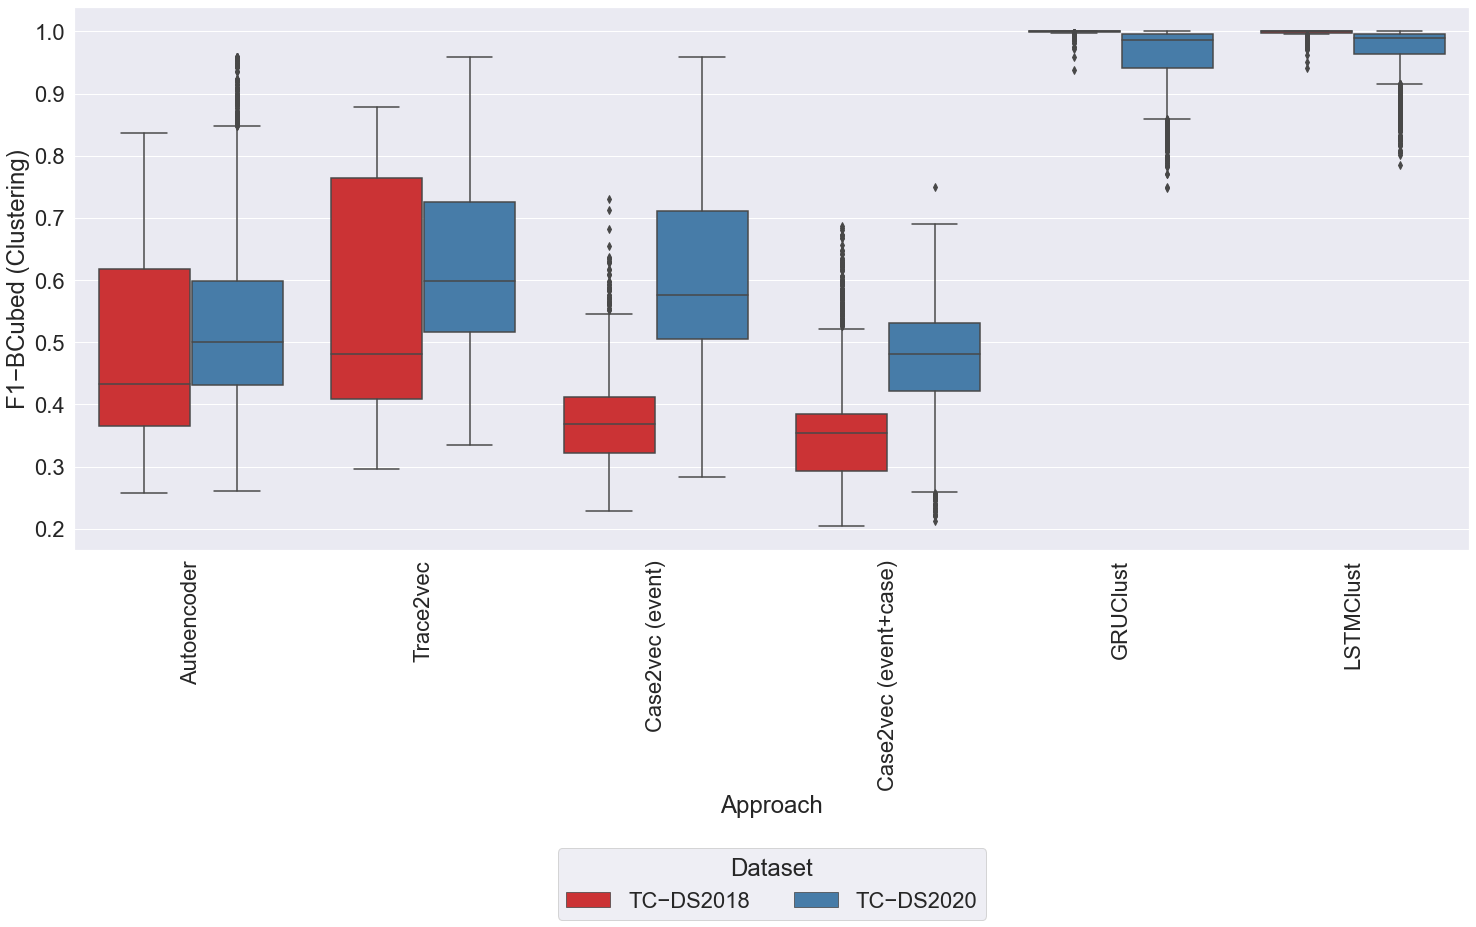

In [106]:
fig, ax = plt.subplots(figsize=(25,10))
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)
plt.xticks(rotation=90)

sns.boxplot(data= output_df, orient='v',hue = 'Dataset',x="Approach", y="F1−BCubed (Clustering)",ax=ax, palette='Set1')

plt.legend(title="Dataset",loc=8,bbox_to_anchor=(0.5,-0.7),ncol=2)
